In [2]:
from src.components.data_ingestion import DataLoader
data_directory = '../Data/train_data/'  # Update this with the path to your /Data directory
data_loader = DataLoader(data_directory,full=True)
combined_df = data_loader.load_all_parquet_files()

In [5]:
combined_df.columns

Index(['DT', 'SERVER', 'NMSG', 'NMSGNP', 'N1100', 'N1120', 'N1420', 'TPSRT',
       'TPSNRT', 'TDRRT', 'TDRNRT', 'TDRMAXRT', 'TDRMAXNRT', 'TO200RT',
       'TO200NRT', 'TO500RT', 'TO500NRT', 'N1200', 'NADVTO', 'N1220', 'NADVOF',
       'NPOKER', 'TDRPOKER', 'TDRMAXPOKER', 'NAICLOUD', 'N_NS_AICLOUD',
       'N_RESP_AICLOUD', 'N_TO_AICLOUD', 'TDR_AICLOUD', 'TDRMAX_AICLOUD'],
      dtype='object')

In [60]:
combined_df.dtypes

DT                datetime64[ns]
SERVER                    object
NMSG                     float64
NMSGNP                   float64
N1100                    float64
N1120                    float64
N1420                    float64
TPSRT                    float64
TPSNRT                   float64
TDRRT                    float64
TDRNRT                   float64
TDRMAXRT                 float64
TDRMAXNRT                float64
TO200RT                  float64
TO200NRT                 float64
TO500RT                  float64
TO500NRT                 float64
N1200                    float64
NADVTO                   float64
N1220                    float64
NADVOF                   float64
NPOKER                   float64
TDRPOKER                 float64
TDRMAXPOKER              float64
NAICLOUD                 float64
N_NS_AICLOUD             float64
N_RESP_AICLOUD           float64
N_TO_AICLOUD             float64
TDR_AICLOUD              float64
TDRMAX_AICLOUD           float64
dtype: obj

In [38]:
print(combined_df[["TO500RT"]].head())
print(combined_df["TO500RT"].max())
print(combined_df["TO500RT"].min())

   TO500RT
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
8355.0
0.0


Mean: 0.38335356060331605
Median: 0.0
Mode: 0.0


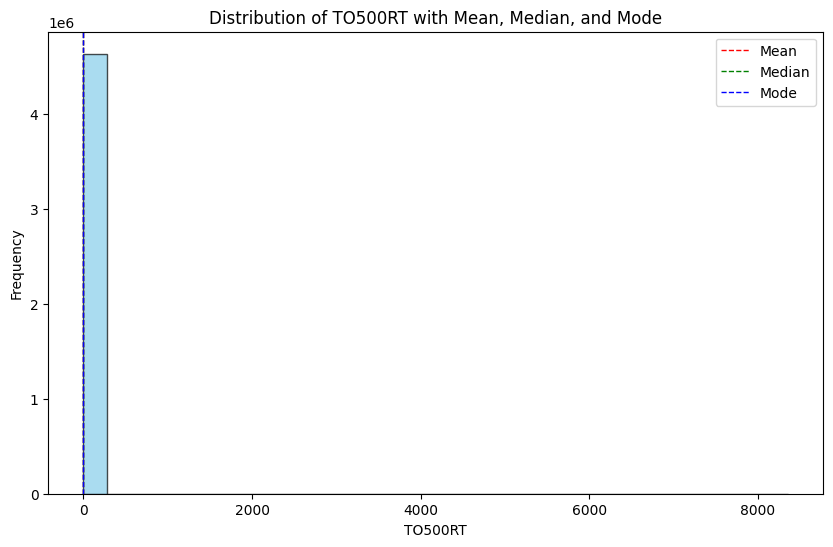

In [56]:
import numpy as np
import pandas as pd

# Calculate mean, median, and mode
mean_TO500RT = combined_df["TO500RT"].mean()
median_TO500RT = combined_df["TO500RT"].median()
mode_TO500RT = combined_df["TO500RT"].mode()[0]  # Mode can have multiple values, so we choose the first one

print("Mean:", mean_TO500RT)
print("Median:", median_TO500RT)
print("Mode:", mode_TO500RT)

import matplotlib.pyplot as plt
# Create a figure
plt.figure(figsize=(10,6))

# Create a histogram to show the distribution of the data
plt.hist(combined_df["TO500RT"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add mean, median, and mode to the plot
plt.axvline(mean_TO500RT, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_TO500RT, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_TO500RT, color='b', linestyle='dashed', linewidth=1, label='Mode')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('TO500RT')
plt.ylabel('Frequency')
plt.title('Distribution of TO500RT with Mean, Median, and Mode')

# Show the plot
plt.show()



In [55]:
print("Total length of records: ",len(combined_df))
print("Records with 0 TimeOuts: ",len(combined_df[["DT","SERVER","NMSG","TO500RT"] ][combined_df["TO500RT"] ==0]))
print("Records with TimeOut values: ",len(combined_df) - 4309130)

Total length of records:  4637304
Records with 0 TimeOuts:  4309130
Records with TimeOut values:  328174


In [37]:
combined_df.iloc()[3]["NMSG"]-combined_df.iloc()[3]["N1100"] - combined_df.iloc()[3]["N1120"] -combined_df.iloc()[3]["N1420"] -combined_df.iloc()[3]["N1200"]-combined_df.iloc(  )[3]["N1220"]

0.0

**Analysis** <br>
- From **4637304** records only **328174** do not have TO values
- NMSG = N1100+ N1120+ N1420+ N1200+ N1220

In [2]:
import pandas as pd

# Assuming your combined DataFrame is named combined_df

# Get unique server values
unique_servers = combined_df['SERVER'].unique()

# Create a dictionary to store DataFrames for each server
server_dfs = {}

# Iterate over unique server values and filter the combined DataFrame
for server in unique_servers:
    server_name = server.replace('.', '_')  # Replace dots with underscores
    server_dfs[server_name] = combined_df[combined_df['SERVER'] == server].reset_index(drop=True)

# Now server_dfs dictionary contains separate DataFrames for each server
# Server names have dots replaced with underscores and indexes are reset
# You can access them using server names as keys, for example:
# server_dfs['simislnxnss00_si_it'] will give you the DataFrame for 'simislnxnss00.si.it'


In [3]:
##########################################################
# HEATMAP
##########################################################

import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming you have already created server_dfs dictionary with separate DataFrames

# Create a directory to save the plots if it doesn't exist
save_dir = 'plots/heatmap_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate over the DataFrames in server_dfs and plot heatmap for each DataFrame
for server_name, df in server_dfs.items():
    columns_to_plot = ['NMSG', 'NMSGNP', 'N1100', 'N1120', 'N1420', 'TPSRT','TPSNRT', 'TDRRT', 'TDRNRT', 'TDRMAXRT', 'TDRMAXNRT', 'TO200RT','TO200NRT', 'TO500RT', 'TO500NRT', 'N1200', 'NADVTO', 'N1220', 'NADVOF','NPOKER', 'TDRPOKER', 'TDRMAXPOKER', 'NAICLOUD', 'N_NS_AICLOUD','N_RESP_AICLOUD', 'N_TO_AICLOUD', 'TDR_AICLOUD', 'TDRMAX_AICLOUD']
    plt.figure(figsize=(18, 13))  # Set the figure size
    sns.heatmap(df[columns_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Plot the heatmap with correlation values
    plt.title(f'Heatmap for {server_name}')  # Set the title
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(os.path.join(save_dir, f'heatmap_{server_name}.png'))  # Save the plot
    plt.close()  # Close the plot to release memory

print("Plots saved successfully.")


Plots saved successfully.


In [4]:
##########################################################
# DESCRIPTION per SERVER
##########################################################

# Create a directory to store the statistical information if it doesn't exist
stat_info_dir = "plots/stat_info"
if not os.path.exists(stat_info_dir):
    os.makedirs(stat_info_dir)

# Iterate over the DataFrames in server_dfs
for server_name, df in server_dfs.items():
    # Prepare the statistical information as a string
    stat_info = "#"*100 + "\n"
    stat_info += f"Length of the {server_name} Server data: {len(df)}\n"
    stat_info += "#"*100 + "\n"
    stat_info += df.describe().to_string() + "\n\n"
    
    # Save the statistical information to a text file
    stat_filename = os.path.join(stat_info_dir, f'stat_info_{server_name}.txt')
    with open(stat_filename, 'w') as f:
        f.write(stat_info)


In [6]:
##########################################################
# Distrubutions of the Features
##########################################################

import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats

# Set base plot directory
base_plot_dir = "plots/server_plots"

# Create a directory to store the plots if it doesn't exist
if not os.path.exists(base_plot_dir):
    os.makedirs(base_plot_dir)

# Iterate over the DataFrames in server_dfs
for server_name, df in server_dfs.items():
    # Create a directory for the current server if it doesn't exist
    plot_dir = os.path.join(base_plot_dir, server_name)
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    # Plot the distribution of columns for the current DataFrame
    for column in columns_to_plot:
        # Create a new figure for the current column
        fig, ax = plt.subplots(figsize=(18, 13))
        sns.histplot(df[column], kde=True, ax=ax)  # Plot the distribution of the current column
        ax.set_title(f'Distribution of {column}')  # Set the title
        ax.set_xlabel(column)  # Set the x-label
        ax.set_ylabel('Frequency')  # Set the y-label
        
        # Calculate mean and median
        mean_value = df[column].mean()
        median_value = df[column].median()
        
        # Add mean and median to the plot
        ax.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
        ax.axvline(median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
        
        # # Calculate mode
        # try:
        #     mode_value = stats.mode(df[column])[0][0]
        #     ax.axvline(mode_value, color='b', linestyle='--', label=f'Mode: {mode_value}')
        # except IndexError:
        #     pass  # Skip adding mode if it's not available
        
        # Add legend
        ax.legend()
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the plot as a PNG file with explicit folder for each column
        plot_filename = os.path.join(plot_dir, f'{column}_distribution.png')
        plt.savefig(plot_filename, bbox_inches='tight')
        
        plt.close()  # Close the plot to free up memory


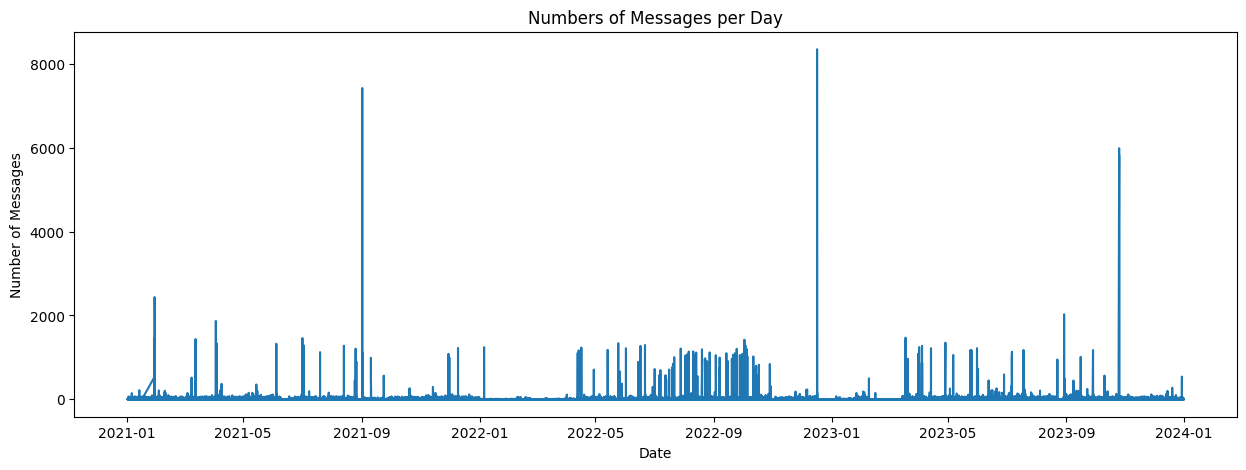

In [71]:
from src.logger import *
from src.exception import CustomException
import os
import sys
from neuralprophet import NeuralProphet, set_log_level, set_random_seed, save
from src.components.model_training import *
from src.utils import *
import mlflow
from src.mlflow_utils import *
import logging
import time

train_data = read_csv_and_convert_date('../artifacts/DT_TO500RT_SERVER/train_data.csv')

train_data = train_data[train_data["SERVER"]=="simislnxnss01.si.it"].reset_index()
# plot_data(train_data[train_data["SERVER"]=="simislnxnss01.si.it"])
plot_data(train_data)

In [3]:
train_data.columns

Index(['ds', 'y', 'SERVER'], dtype='object')

In [57]:
len(train_data)

4463636

In [51]:
x = train_data[(train_data["SERVER"]=="simislnxnss01.si.it") & (train_data["ds"]<"2021-01-01 01:59:00")]

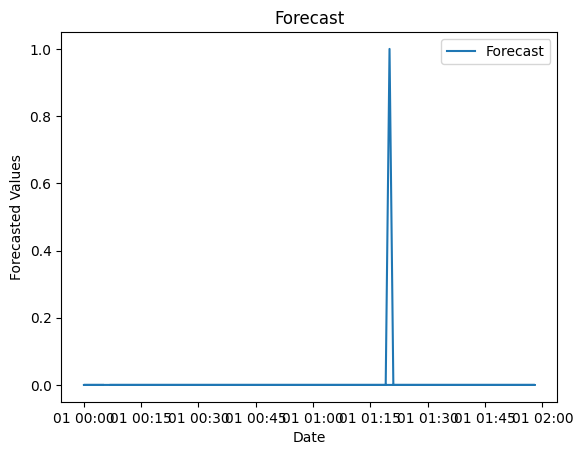

In [54]:
import matplotlib.pyplot as plt

plt.plot(x["ds"], x["y"], label="Forecast")
plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("Forecast")
plt.legend()
plt.show()

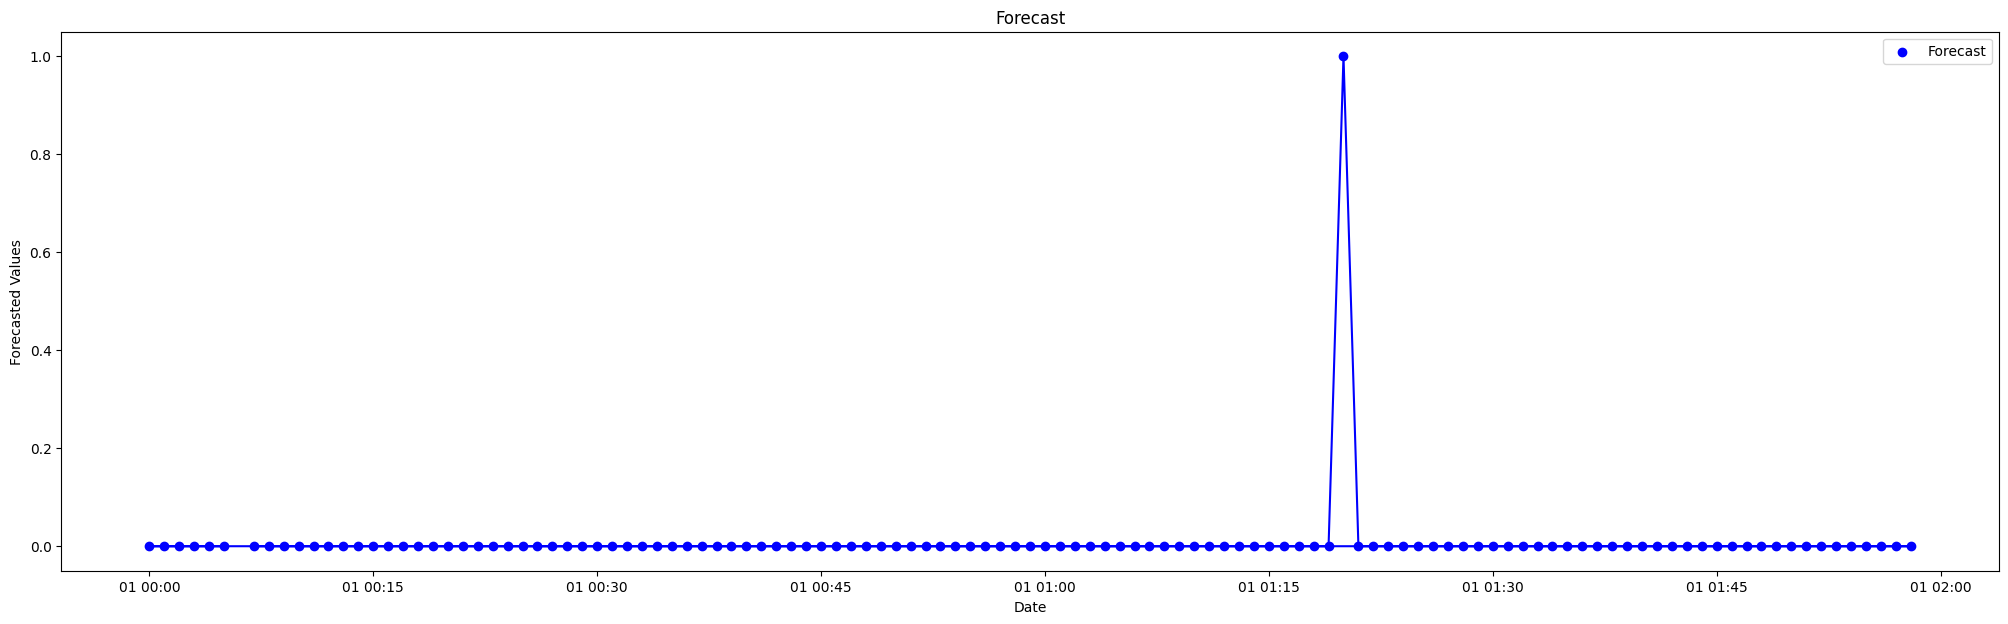

In [56]:
plt.figure(figsize=(25,7))
plt.scatter(x["ds"], x["y"], label="Forecast", color='blue')
plt.plot(x["ds"], x["y"], linestyle='-', color='blue')  # Connect points with lines
plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("Forecast")
plt.legend()
plt.show()

In [50]:
x.head(50)

,ds,y,SERVER
4130391,2021-01-01 00:07:00,0.0,simislnxnss01.si.it
4130394,2021-01-01 00:08:00,0.0,simislnxnss01.si.it
4130397,2021-01-01 00:09:00,0.0,simislnxnss01.si.it
4130400,2021-01-01 00:10:00,0.0,simislnxnss01.si.it
4130403,2021-01-01 00:11:00,0.0,simislnxnss01.si.it
4130406,2021-01-01 00:12:00,0.0,simislnxnss01.si.it
4130409,2021-01-01 00:13:00,0.0,simislnxnss01.si.it
4130412,2021-01-01 00:14:00,0.0,simislnxnss01.si.it
4130415,2021-01-01 00:15:00,0.0,simislnxnss01.si.it
4130418,2021-01-01 00:16:00,0.0,simislnxnss01.si.it


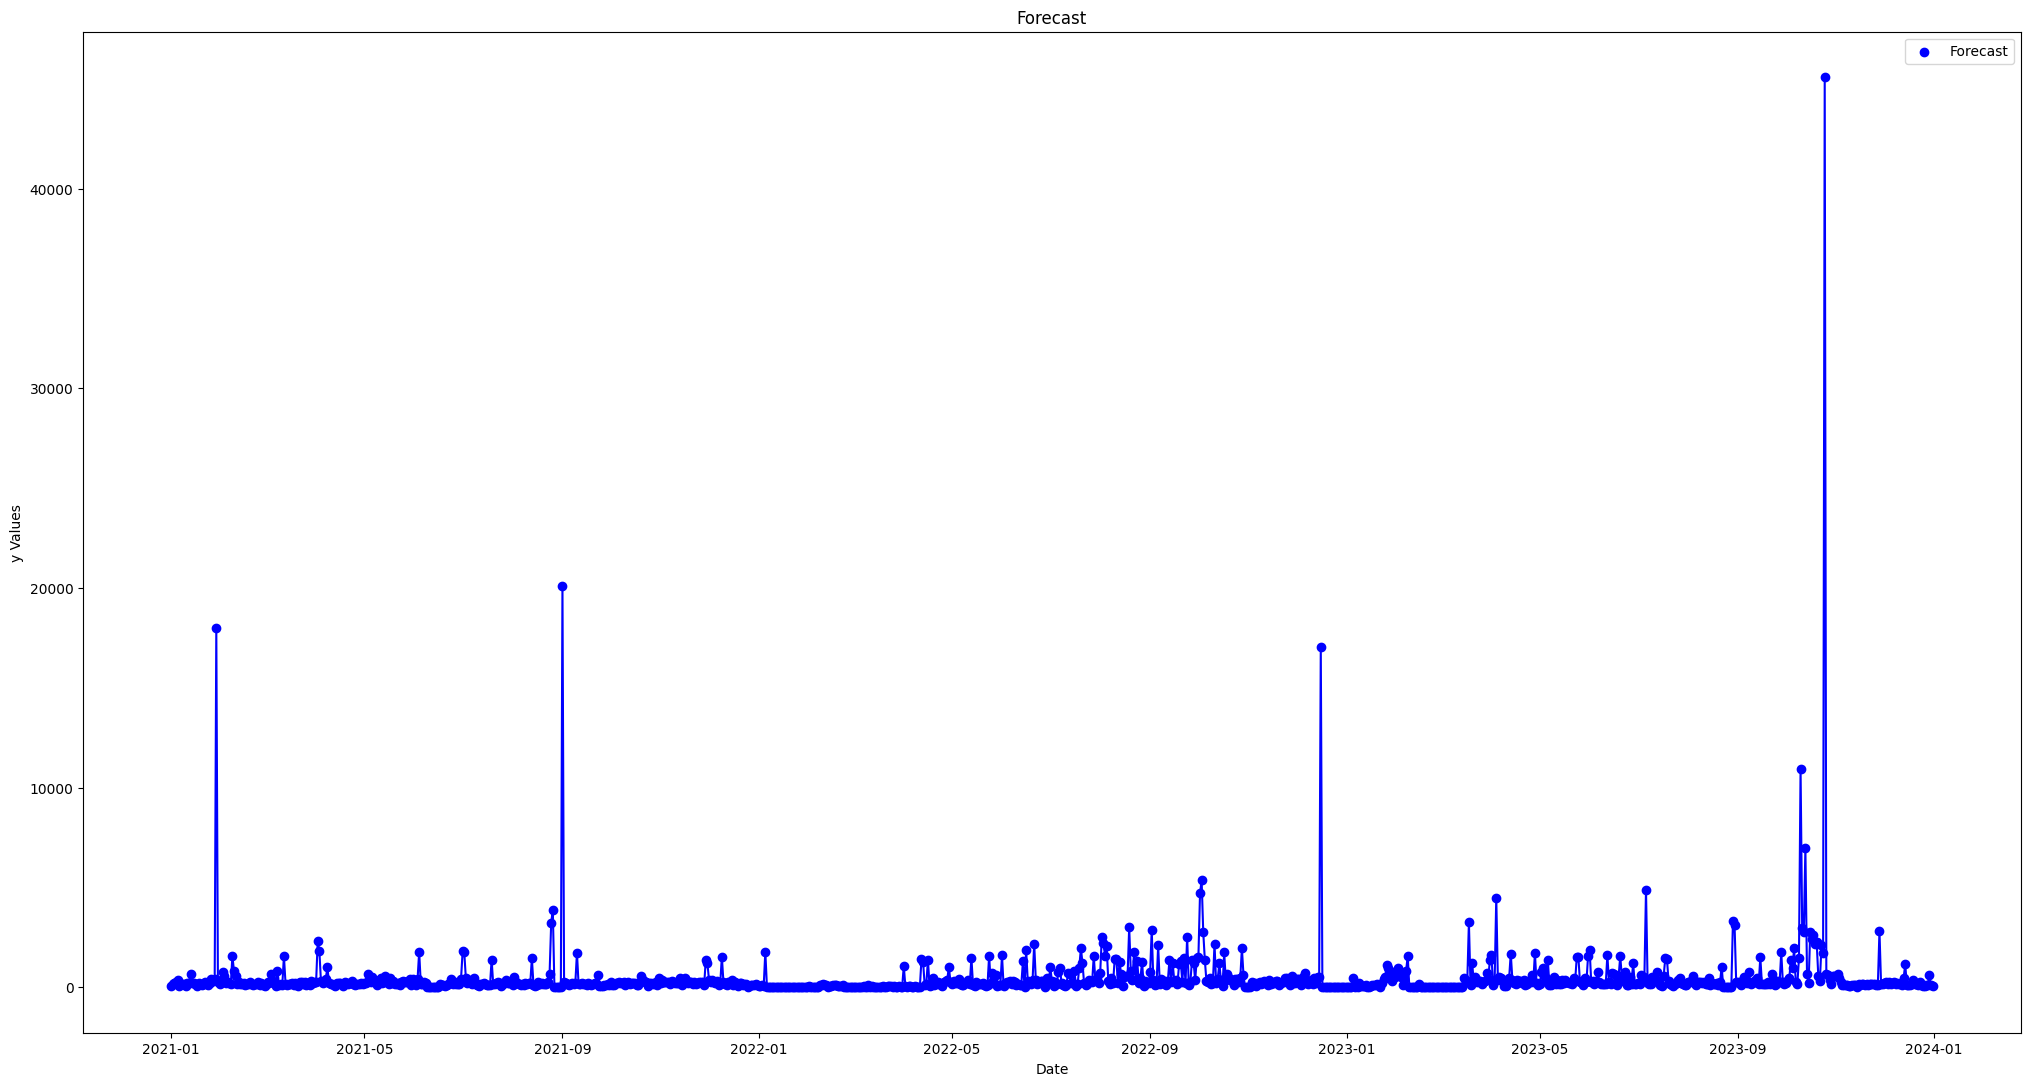

In [81]:
import pandas as pd

# Assuming train_data is your DataFrame containing the data
# Replace train_data with your actual DataFrame name

# Convert 'ds' column to datetime type if it's not already
train_data['ds'] = pd.to_datetime(train_data['ds'])
# y = train_data[(train_data["ds"]<"2024-01-01 00:00:00")& (train_data["ds"]>"2022-12-31 23:59:59")]
y = train_data
# Group by date and sum the 'y' values
daily_aggregated_data = y.groupby(y['ds'].dt.date)['y'].sum().reset_index()

plt.figure(figsize=(25,13))
plt.scatter(daily_aggregated_data["ds"], daily_aggregated_data["y"], label="Forecast", color='blue')
plt.plot(daily_aggregated_data["ds"], daily_aggregated_data["y"], linestyle='-', color='blue')  # Connect points with lines
plt.xlabel("Date")
plt.ylabel("y Values")
plt.title("Forecast")
plt.legend()
plt.show()


In [94]:
df_NMSG = read_csv_and_convert_date('../artifacts/DT_NMSG/train_data.csv')
df_NMSG.rename(columns={"y": "NMSG"}, inplace=True)
df_NMSG['ds'] = pd.to_datetime(df_NMSG['ds'])
df_NMSG.dtypes

ds      datetime64[ns]
NMSG           float64
dtype: object

In [96]:
daily_aggregated_data['ds'] = pd.to_datetime(daily_aggregated_data['ds'])
daily_aggregated_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

             ds        NMSG      y  y_percent
0    2021-01-01   3339149.0   45.0   0.001348
1    2021-01-02   9143692.0  148.0   0.001619
2    2021-01-03   8210354.0  205.0   0.002497
3    2021-01-04  14744685.0  245.0   0.001662
4    2021-01-05  12361025.0  384.0   0.003107
...         ...         ...    ...        ...
1090 2023-12-27  19420770.0  107.0   0.000551
1091 2023-12-28  19612986.0  124.0   0.000632
1092 2023-12-29  20822801.0  626.0   0.003006
1093 2023-12-30  22067761.0  116.0   0.000526
1094 2023-12-31  15005678.0   67.0   0.000446

[1095 rows x 4 columns]


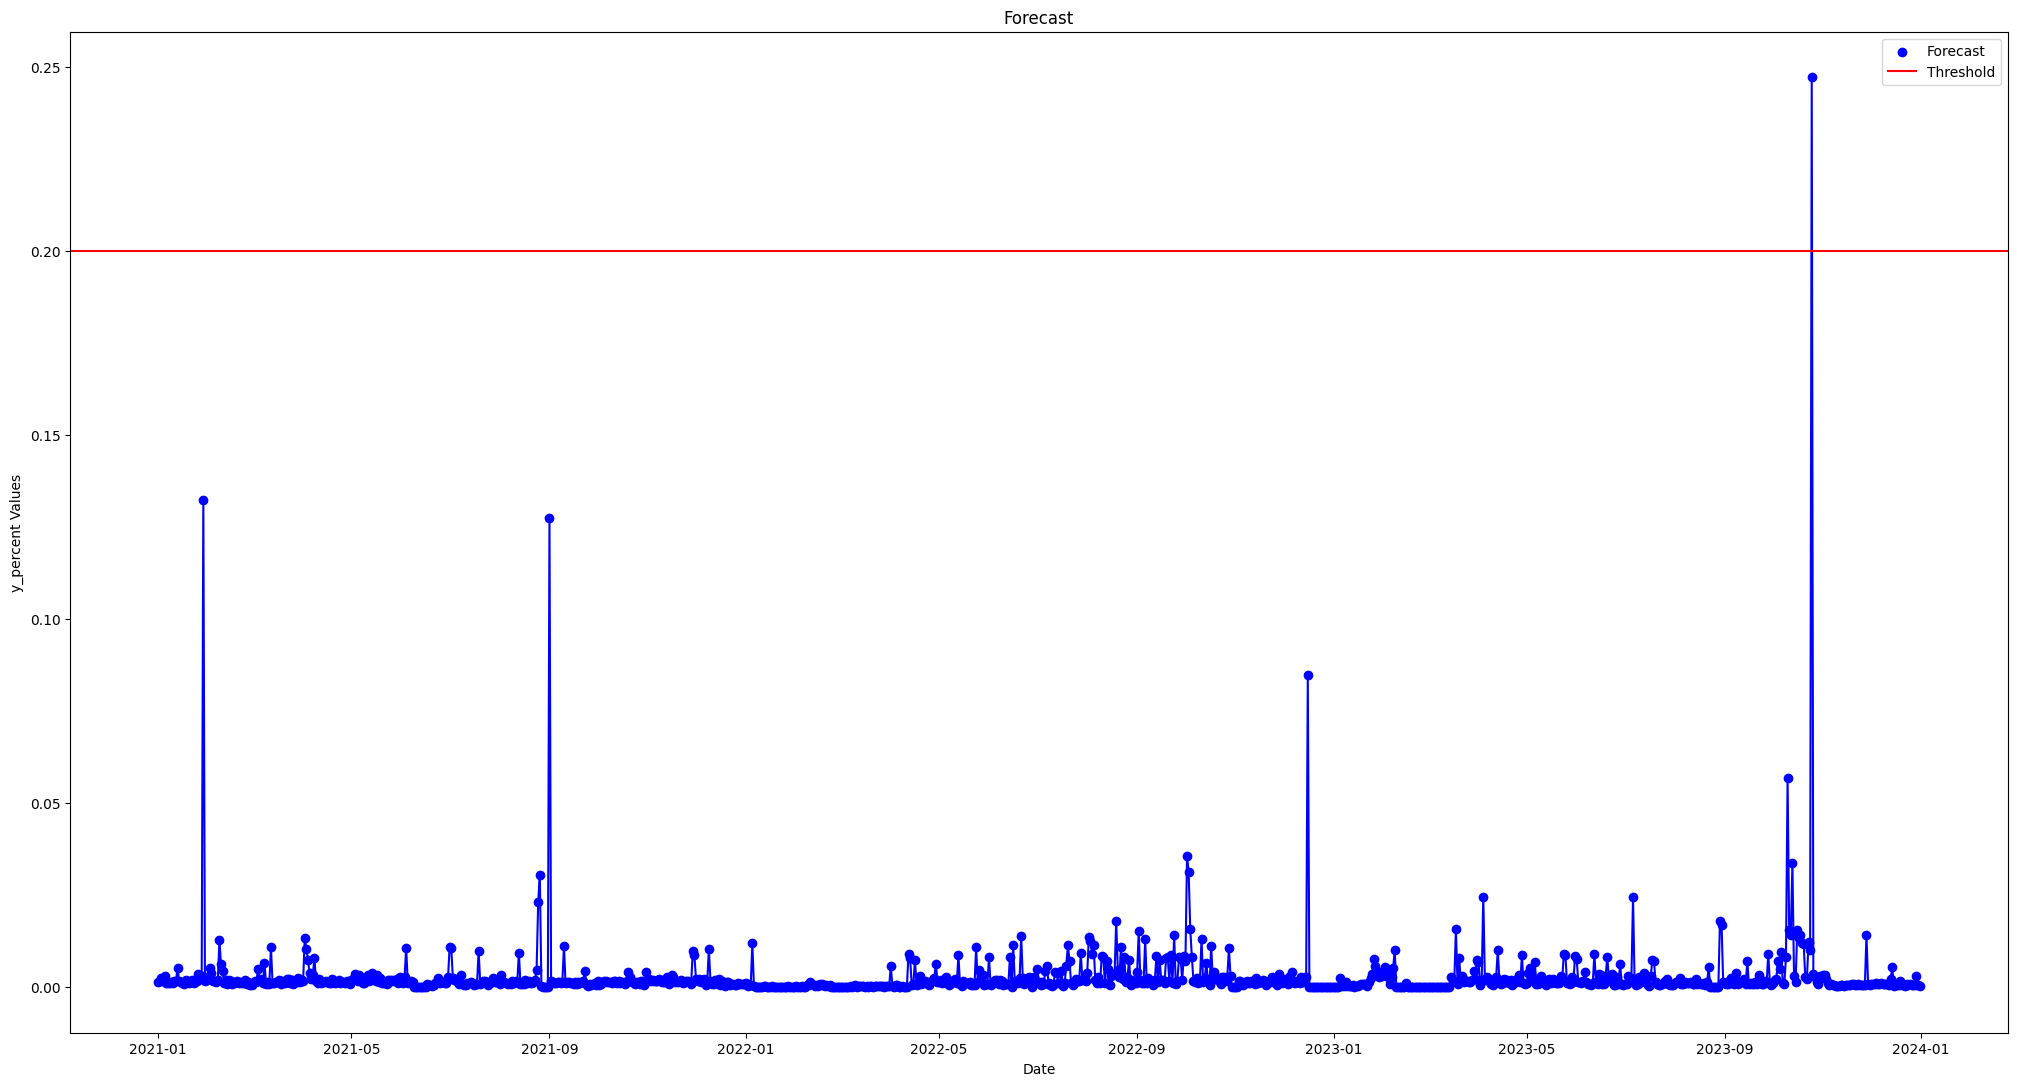

In [99]:
import pandas as pd

# Assuming df_NMSG and daily_aggregated_data are your DataFrames
# Replace df_NMSG and daily_aggregated_data with your actual DataFrame names

# Merge the two DataFrames on the 'ds' column
merged_data = pd.merge(df_NMSG, daily_aggregated_data, on='ds', how='inner')

# Add a new column representing the percentage of 'y' out of 'NMSG'
merged_data['y_percent'] = (merged_data['y'] / merged_data['NMSG']) * 100

# Print the merged data
print(merged_data)

plt.figure(figsize=(25,13))
plt.scatter(merged_data["ds"], merged_data["y_percent"], label="Forecast", color='blue')
plt.plot(merged_data["ds"], merged_data["y_percent"], linestyle='-', color='blue')  # Connect points with lines
plt.axhline(y=0.2, color='red', linestyle='-', label='Threshold')  # Add red horizontal line at y=100
plt.xlabel("Date")
plt.ylabel("y_percent Values")
plt.title("Forecast")
plt.legend()
plt.show()



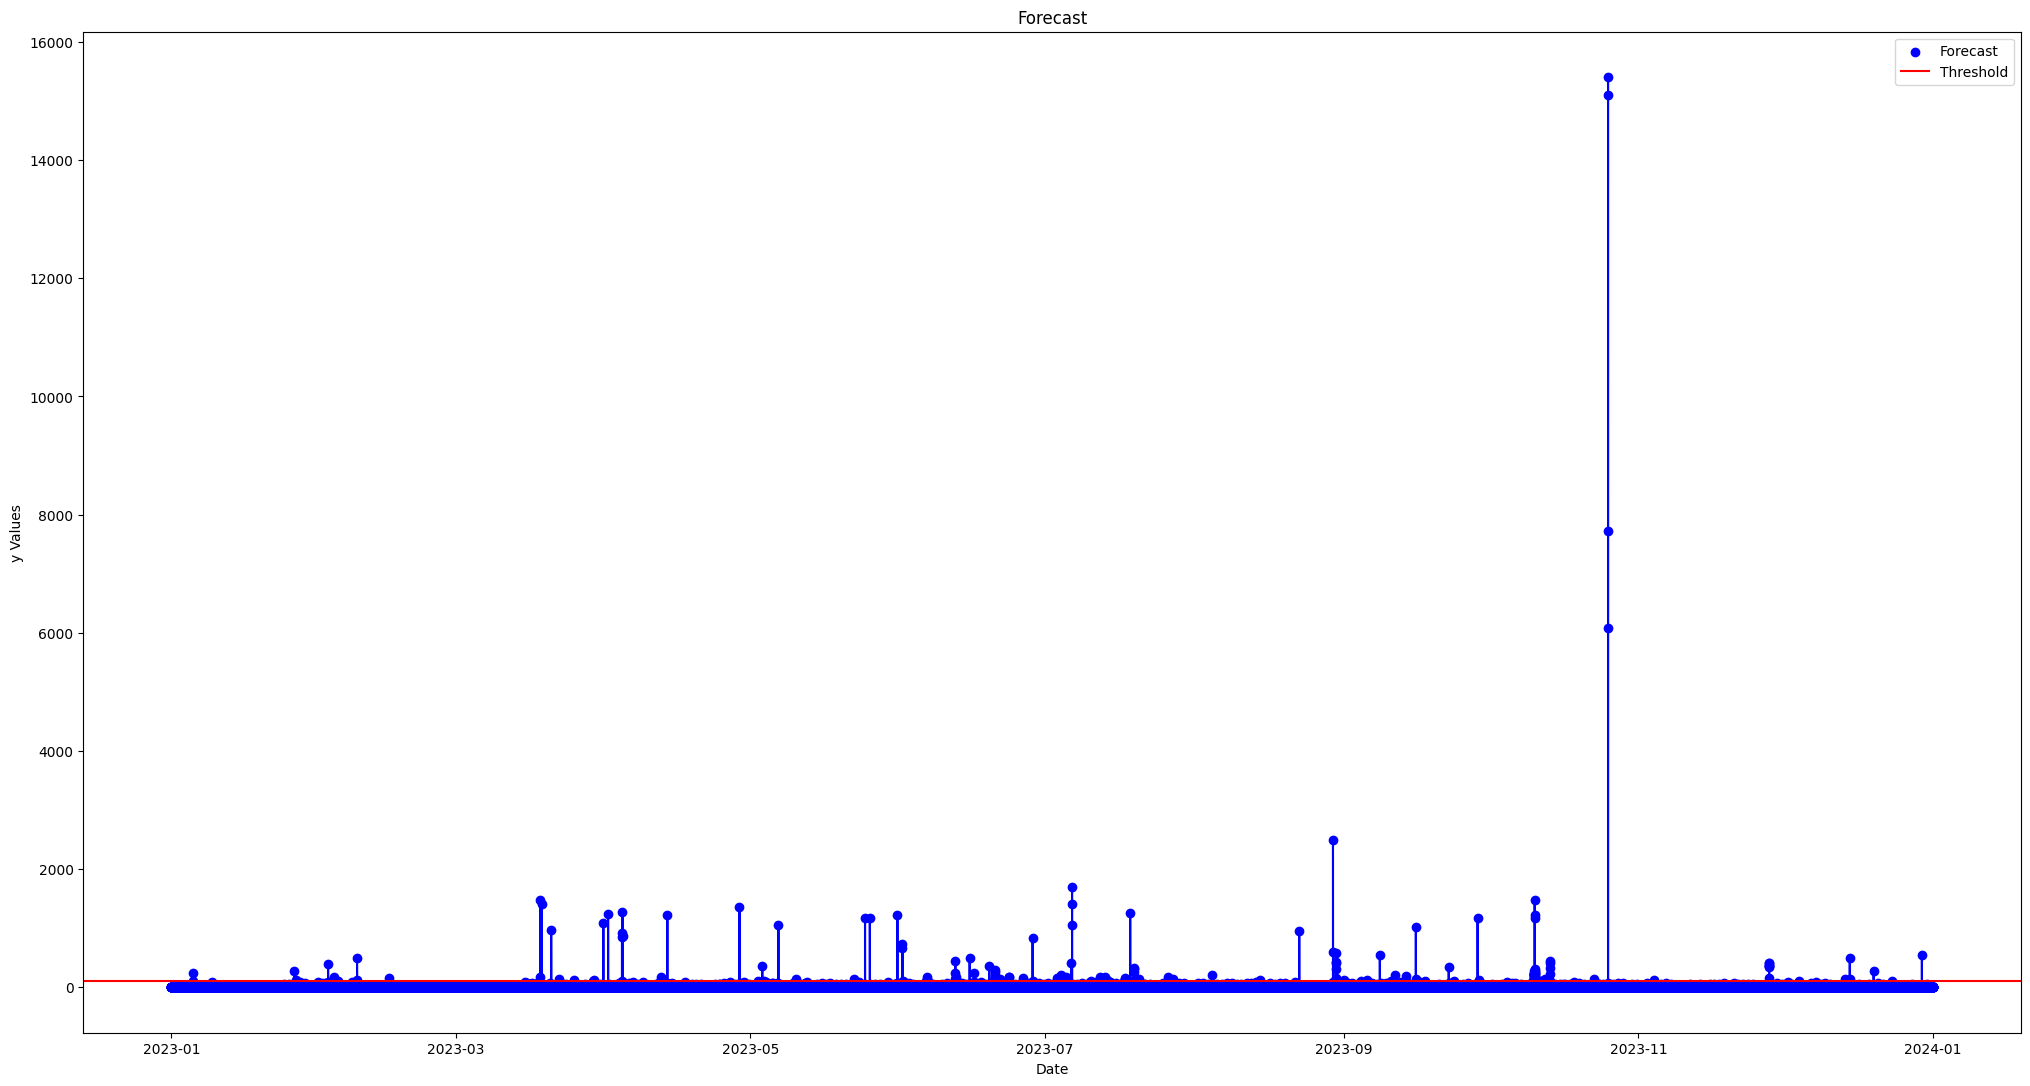

In [79]:
import pandas as pd

# Assuming train_data is your DataFrame containing the data
# Replace train_data with your actual DataFrame name

# Convert 'ds' column to datetime type if it's not already
train_data['ds'] = pd.to_datetime(train_data['ds'])
# Group by 5-minute intervals and sum the 'y' values
aggregated_data_5min = train_data[(train_data["ds"]<"2024-01-01 00:00:00")& (train_data["ds"]>"2022-12-31 23:59:59")].groupby(pd.Grouper(key='ds', freq='5T'))['y'].sum().reset_index()

plt.figure(figsize=(25,13))
plt.scatter(aggregated_data_5min["ds"], aggregated_data_5min["y"], label="Forecast", color='blue')
plt.plot(aggregated_data_5min["ds"], aggregated_data_5min["y"], linestyle='-', color='blue')  # Connect points with lines
plt.axhline(y=100, color='red', linestyle='-', label='Threshold')  # Add red horizontal line at y=100
plt.xlabel("Date")
plt.ylabel("y Values")
plt.title("Forecast")
plt.legend()
plt.show()


In [78]:
aggregated_data_5min

,ds,y
0,2021-01-01 00:00:00,0.0
1,2021-01-01 00:05:00,0.0
2,2021-01-01 00:10:00,0.0
3,2021-01-01 00:15:00,0.0
4,2021-01-01 00:20:00,0.0
...,...,...
315355,2023-12-31 23:35:00,0.0
315356,2023-12-31 23:40:00,0.0
315357,2023-12-31 23:45:00,0.0
315358,2023-12-31 23:50:00,0.0
